# Autoencoder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Data
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import fully_connected

In [2]:
mnist = input_data.read_data_sets("/MNIST_data/", one_hot = True)

W0712 19:28:13.121007 11672 deprecation.py:323] From <ipython-input-2-707bddd68d59>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0712 19:28:13.127989 11672 deprecation.py:323] From C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0712 19:28:13.129983 11672 deprecation.py:323] From C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruc

Extracting /MNIST_data/train-images-idx3-ubyte.gz


W0712 19:28:13.446137 11672 deprecation.py:323] From C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0712 19:28:13.454116 11672 deprecation.py:323] From C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0712 19:28:13.534921 11672 deprecation.py:323] From C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecat

Extracting /MNIST_data/train-labels-idx1-ubyte.gz
Extracting /MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
num_inputs = 784
num_hid1 = 392
num_hid2 = 196
num_hid3 = num_hid1
num_output = num_inputs

lr = 0.01
actf = tf.nn.relu

In [4]:
X = tf.placeholder(tf.float32, shape = [None, num_inputs])
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs, num_hid1]), dtype = tf.float32)
w2 = tf.Variable(initializer([num_hid1, num_hid2]), dtype = tf.float32)
w3 = tf.Variable(initializer([num_hid2, num_hid3]), dtype = tf.float32)
w4 = tf.Variable(initializer([num_hid3, num_output]), dtype = tf.float32)

b1 = tf.Variable(tf.zeros(num_hid1))
b2 = tf.Variable(tf.zeros(num_hid2))
b3 = tf.Variable(tf.zeros(num_hid3))
b4 = tf.Variable(tf.zeros(num_output))

hid_layer1 = actf(tf.matmul(X, w1) + b1)
hid_layer2 = actf(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = actf(tf.matmul(hid_layer2, w3) + b3)
output_layer = actf(tf.matmul(hid_layer3, w4) + b4)

In [5]:
loss = tf.reduce_mean(tf.square(output_layer - X))

optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [6]:
num_epoch = 5
batch_size = 150
num_test_images = 10

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epoch):
        
        num_batches = mnist.train.num_examples//batch_size
        for iter in range(num_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X:X_batch})
            
        train_loss = loss.eval(feed_dict = {X:X_batch})
        print("Epoch {} loss {}".format(epoch, train_loss))
        
    results = output_layer.eval(feed_dict = {X:mnist.test.images[:num_test_images]})

Epoch 0 loss 0.03317631036043167
Epoch 1 loss 0.031064605340361595
Epoch 2 loss 0.028108341619372368
Epoch 3 loss 0.026227878406643867
Epoch 4 loss 0.025265906006097794


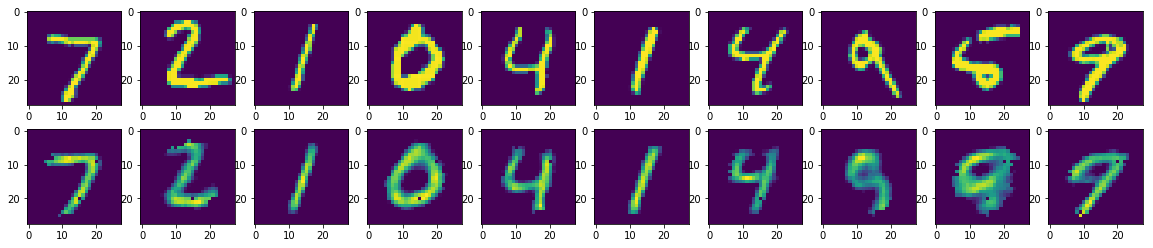

In [7]:
f, a = plt.subplots(2, 10, figsize = (20, 4))

for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))